In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import vaex
import gizmo_analysis as ga
import sys
sys.path.append('../mock')
import allvariables
import beta
import getMasks
import getPhotometric
import getConversions
import getPlots

## Access Mock Parameters

In [2]:
# Get the parameters from the config file
params = allvariables.getparamsnotebook()

# Define parameter names
param_names = [
        "snap", "sim", "sim_dir", "sat_id_dir", "rmin", "rmax", "sat_mask", "ananke_name", 
        "photo_sys", "cmd_magnames", "app_mag_lim_lo", "app_mag_lim_hi", 
        "abs_mag_lim_lo", "abs_mag_lim_hi", "ananke_r_max", "fsample"
]

# Initialize parameter dictionary
params_dict = {}

# Assign values to parameters and declare them locally
for param_name, param_value in zip(param_names, params):
    params_dict[param_name] = param_value
    locals()[param_name] = param_value

## Access Ananke Data

In [3]:
# Get the current working directory
current_dir = os.getcwd()

# Go back one directory (to 'src') and then to 'mock'
ananke_file_path = os.path.join(current_dir, "..", "mock", "survey.m12b_385.h5")
ananke_sat_file_path = os.path.join(current_dir, "..", "mock", "survey.m12b_385_sat.h5")
print(f"\nOpening data from: \n{ananke_file_path} \n{ananke_sat_file_path}")

# Check if the file exists
if os.path.exists(ananke_file_path):
    # Proceed with opening the file
    survey = vaex.open(ananke_file_path)
else:
    print(f"{ananke_file_path} file does not exist.")
    
# Check if the file exists
if os.path.exists(ananke_sat_file_path):
    # Proceed with opening the file
    survey_sat = vaex.open(ananke_sat_file_path)
else:
    print(f"{ananke_sat_file_path} file does not exist.")


Opening data from: 
/home/jovyan/home/rubin_mw_mocks/src/analysis/../mock/survey.m12b_385.h5 
/home/jovyan/home/rubin_mw_mocks/src/analysis/../mock/survey.m12b_385_sat.h5


In [4]:
# Print all the columns
column_names = survey.column_names
print(column_names)

['age', 'alpha', 'calcium', 'carbon', 'dec', 'dform', 'dmod', 'feh', 'glat', 'glon', 'grav', 'helium', 'lsst_gmag', 'lsst_gmag_Err', 'lsst_gmag_Intrinsic', 'lsst_gmag_Sig', 'lsst_imag', 'lsst_imag_Err', 'lsst_imag_Intrinsic', 'lsst_imag_Sig', 'lsst_rmag', 'lsst_rmag_Err', 'lsst_rmag_Intrinsic', 'lsst_rmag_Sig', 'lsst_umag', 'lsst_umag_Err', 'lsst_umag_Intrinsic', 'lsst_umag_Sig', 'lsst_ymag', 'lsst_ymag_Err', 'lsst_ymag_Intrinsic', 'lsst_ymag_Sig', 'lsst_zmag', 'lsst_zmag_Err', 'lsst_zmag_Intrinsic', 'lsst_zmag_Sig', 'lum', 'mact', 'magnesium', 'mtip', 'mub', 'mudec', 'mul', 'mura', 'neon', 'nitrogen', 'oxygen', 'parentid', 'partid', 'pi', 'px', 'py', 'pz', 'ra', 'rad', 'silicon', 'smass', 'sulphur', 'teff', 'vr', 'vx', 'vy', 'vz']


In [5]:
# Extract apparent magnitudes without satellite
app_g_mag_sat = survey_sat.lsst_gmag.to_numpy()
app_r_mag_sat = survey_sat.lsst_rmag.to_numpy()
app_i_mag_sat = survey_sat.lsst_imag.to_numpy()
app_u_mag_sat = survey_sat.lsst_umag.to_numpy()
app_y_mag_sat = survey_sat.lsst_ymag.to_numpy()
app_z_mag_sat = survey_sat.lsst_zmag.to_numpy()

In [6]:
# Extract the radial distance as parsecs
rad_distance_sat = survey_sat.rad.to_numpy() * 1000

In [7]:
# Extract absolute magnitudes without satellite
g_mag_sat = getConversions.app2abs(app_g_mag_sat, rad_distance_sat)
r_mag_sat = getConversions.app2abs(app_r_mag_sat, rad_distance_sat)
i_mag_sat = getConversions.app2abs(app_i_mag_sat, rad_distance_sat)
u_mag_sat = getConversions.app2abs(app_u_mag_sat, rad_distance_sat)
y_mag_sat = getConversions.app2abs(app_y_mag_sat, rad_distance_sat)
z_mag_sat = getConversions.app2abs(app_z_mag_sat, rad_distance_sat)

## Adding Photometric Error

In [8]:
# Add the sigma value to each apparent magnitude
app_g_mag_sat_err = app_g_mag_sat + getPhotometric.getSigmaVisit('g', app_g_mag_sat)
app_r_mag_sat_err = app_r_mag_sat + getPhotometric.getSigmaVisit('r', app_r_mag_sat)
app_i_mag_sat_err = app_i_mag_sat + getPhotometric.getSigmaVisit('i', app_i_mag_sat)
app_u_mag_sat_err = app_u_mag_sat + getPhotometric.getSigmaVisit('u', app_u_mag_sat)
app_y_mag_sat_err = app_y_mag_sat + getPhotometric.getSigmaVisit('y', app_y_mag_sat)
app_z_mag_sat_err = app_z_mag_sat + getPhotometric.getSigmaVisit('z', app_z_mag_sat)

In [17]:
print(app_g_mag_sat)

[27.24673  27.531029 28.469824 ... 32.717976 31.248549 32.033936]


In [18]:
print(min(app_g_mag_sat))
print(max(app_g_mag_sat))

11.723243
33.913227


In [16]:
print(getPhotometric.getSigmaRand('g', app_g_mag_sat))

[  1.6685718   2.167267    5.1420584 ... 257.1509     66.44
 136.95439  ]


In [19]:
print(getPhotometric.getSigmaVisit('g', app_g_mag_sat))
print(min(getPhotometric.getSigmaVisit('g', app_g_mag_sat)))
print(max(getPhotometric.getSigmaVisit('g', app_g_mag_sat)))

[  1.6685793   2.1672728   5.1420608 ... 257.1509     66.44
 136.95439  ]
0.005000521
773.1895


Here I am calculating absolute magnitude from apparent magnitude with errors. I could also calculate the error using getPhotometric error itself, but I'm not sure with method is correct. 

In [10]:
# Extract absolute magnitudes without satellite and with error
g_mag_sat_err = getConversions.app2abs(app_g_mag_sat_err, rad_distance_sat)
r_mag_sat_err = getConversions.app2abs(app_r_mag_sat_err, rad_distance_sat)
i_mag_sat_err = getConversions.app2abs(app_i_mag_sat_err, rad_distance_sat)
u_mag_sat_err = getConversions.app2abs(app_u_mag_sat_err, rad_distance_sat)
y_mag_sat_err = getConversions.app2abs(app_y_mag_sat_err, rad_distance_sat)
z_mag_sat_err = getConversions.app2abs(app_z_mag_sat_err, rad_distance_sat)

## Color Magnitude Diagram

In [11]:
# Calculate g - r
g_minus_r_sat = app_g_mag_sat - app_r_mag_sat

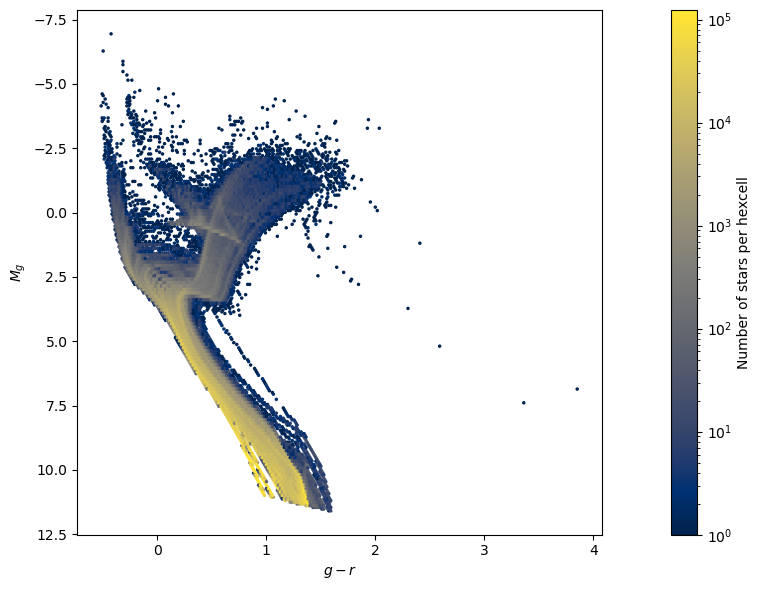

In [12]:
getPlots.colormagplot(g_minus_r_sat, g_mag_sat)

In [13]:
# Calculate g - r with error
g_minus_r_sat_err = app_g_mag_sat_err - app_r_mag_sat_err

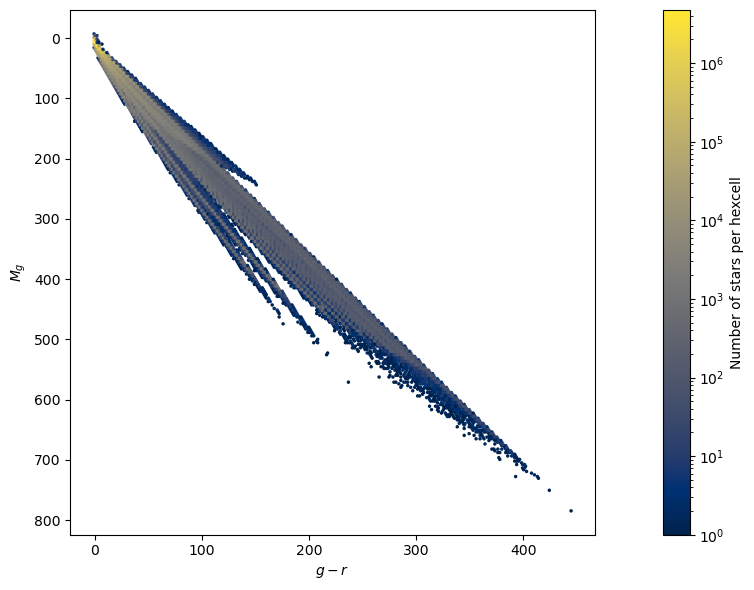

In [14]:
getPlots.colormagplot(g_minus_r_sat_err, g_mag_sat_err)